In [2]:
import pandas as pd

train = pd.read_csv('./data/train.csv').drop('index',axis=1)
# train.drop('introelapse',axis=1,inplace=True)

train.shape

(15000, 69)

In [30]:
import pandas as pd

train = pd.read_csv('./data/train.csv').drop('index',axis=1)
# train.drop('introelapse',axis=1,inplace=True)
# family size 이상치
train = train.drop(1019)
# age 이상치
train = train.drop(train[train['age']>100].index.to_list())
train = train.drop(train[train['introelapse']>50000].index.to_list())
train = train.drop(train[train['testelapse']>50000].index.to_list())
train = train.drop(train[train['surveyelapse']>50000].index.to_list())

test = pd.read_csv('./data/test.csv').drop('index',axis=1)
# test.drop('introelapse',axis=1,inplace=True)
test.loc[test['familysize']>100,'familysize']= train['familysize'].mean()
test.loc[test['age']>100,'age']= train['age'].mean()
test.loc[test['introelapse']>50000,'introelapse']= train['introelapse'].mean()
test.loc[test['testelapse']>50000,'testelapse']= train['testelapse'].mean()
test.loc[test['surveyelapse']>50000,'surveyelapse']= train['surveyelapse'].mean()

test_index = pd.read_csv('./data/test.csv')['index']

pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)
value = train['country'].value_counts().values
rank = list(map(lambda x : 1 if x>1000 else (2 if x>100 else 3),value))
# rank = list(map(lambda x : 1 if x>2000 else (2 if x>1000 else (3 if x>500 else (4 if x>200 else (5 if x>100 else 6)))),value))

temp_dict = {i : 0 for i in train['country'].value_counts().index.to_list()}

rank_dict = dict(zip(train['country'].value_counts().index.to_list(), rank))
rank_dict['nan'] = 0
train['country'] = train['country'].fillna('nan')
train['country'] = train['country'].apply(lambda x : rank_dict[x])
train['Ex'] = (train['TIPI1']+train['TIPI6'])/2
train['Ag'] = (train['TIPI7']+train['TIPI2'])/2
train['Con'] = (train['TIPI3']+train['TIPI8'])/2
train['Es'] =(train['TIPI9']+train['TIPI4'])/2
train['Op'] =(train['TIPI5']+train['TIPI10'])/2
train_fill_na = train.fillna(train.mean())


value = test['country'].value_counts().values
rank = list(map(lambda x : 1 if x>1000 else (2 if x>100 else 3),value))
# rank = list(map(lambda x : 1 if x>2000 else (2 if x>1000 else (3 if x>500 else (4 if x>200 else (5 if x>100 else 6)))),value))

temp_dict = {i : 0 for i in test['country'].value_counts().index.to_list()}

rank_dict = dict(zip(test['country'].value_counts().index.to_list(), rank))
rank_dict['nan'] = 0
test['country'] = test['country'].fillna('nan')
test['country'] = test['country'].apply(lambda x : rank_dict[x])

test['Ex'] = (test['TIPI1']+test['TIPI6'])/2
test['Ag'] = (test['TIPI7']+test['TIPI2'])/2
test['Con'] = (test['TIPI3']+test['TIPI8'])/2
test['Es'] =(test['TIPI9']+test['TIPI4'])/2
test['Op'] =(test['TIPI5']+test['TIPI10'])/2

test_fill_na = test.fillna(test.mean())

In [34]:
train['Q17'].value_counts()

5.0    6105
4.0    4330
3.0    2485
2.0    1391
1.0     565
Name: Q17, dtype: int64

<AxesSubplot:>

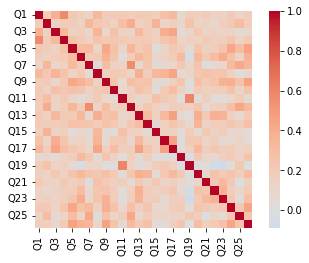

In [33]:
import seaborn as sns

correlations = train[train.columns[:26]].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

<AxesSubplot:>

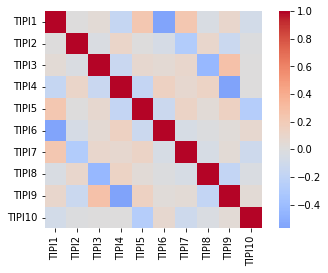

In [12]:
import seaborn as sns

correlations = train[train.columns[30:40]].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

<AxesSubplot:>

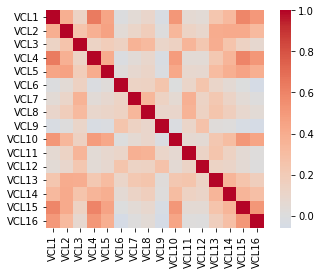

In [13]:
import seaborn as sns

correlations = train[train.columns[40:56]].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [ ]:
import seaborn as sns

correlations = train[train.columns[40:56]].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [14]:
nerd = train[train['nerdiness']==1]
normal = train[train['nerdiness']==0]

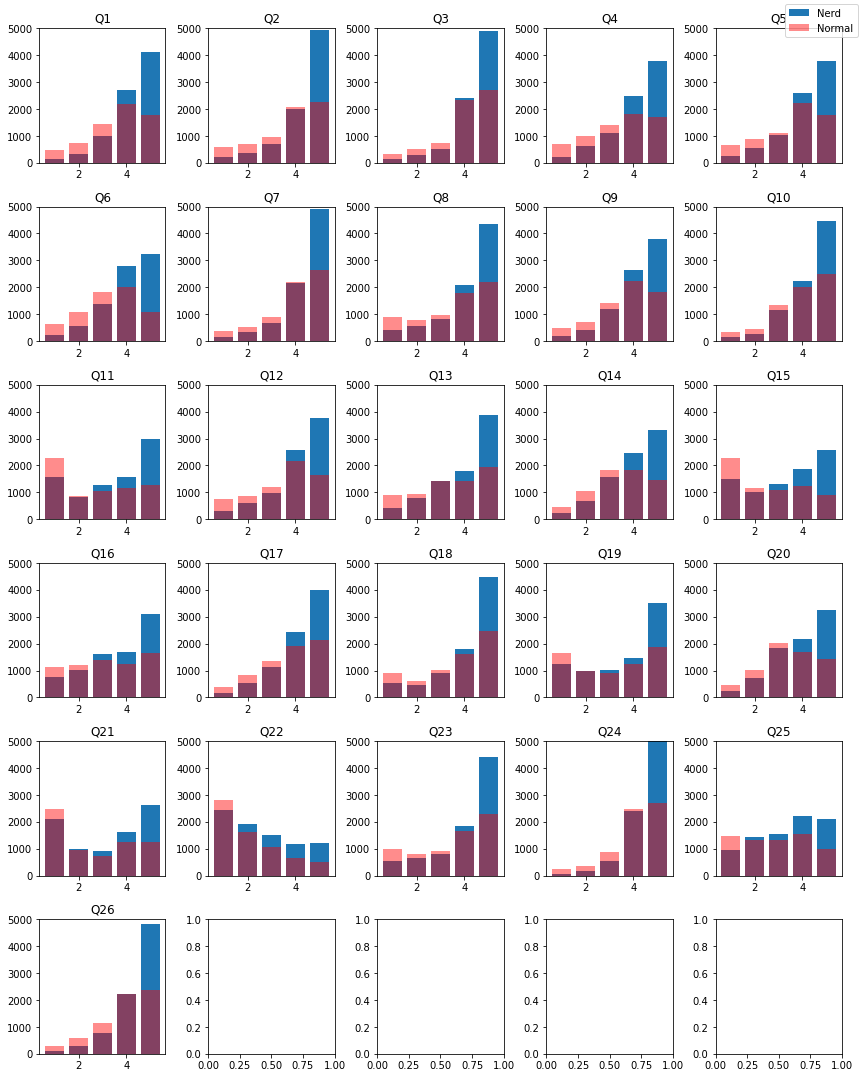

In [15]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(6,5, figsize=(12,15))

for i in range(26):
    x_num = i//5
    y_num = i%5

    plot_dict = nerd.iloc[:,i].value_counts().to_dict()
    plot_dict2 = normal.iloc[:,i].value_counts().to_dict()

    x_values = sorted(plot_dict.keys())
    x_values2 = sorted(plot_dict2.keys())

    y_values = [plot_dict[x] for x in x_values]
    y_values2 = [plot_dict2[x] for x in x_values2]
    
    ax[x_num, y_num].bar(x_values, y_values,alpha=1,label='Nerd')
    ax[x_num, y_num].bar(x_values2, y_values2,alpha=0.45,color='red',label='Normal')

    ax[x_num, y_num].set_title(train.columns[i])
    ax[x_num, y_num].set_ylim(0,5000)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels[:1])]
fig.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()

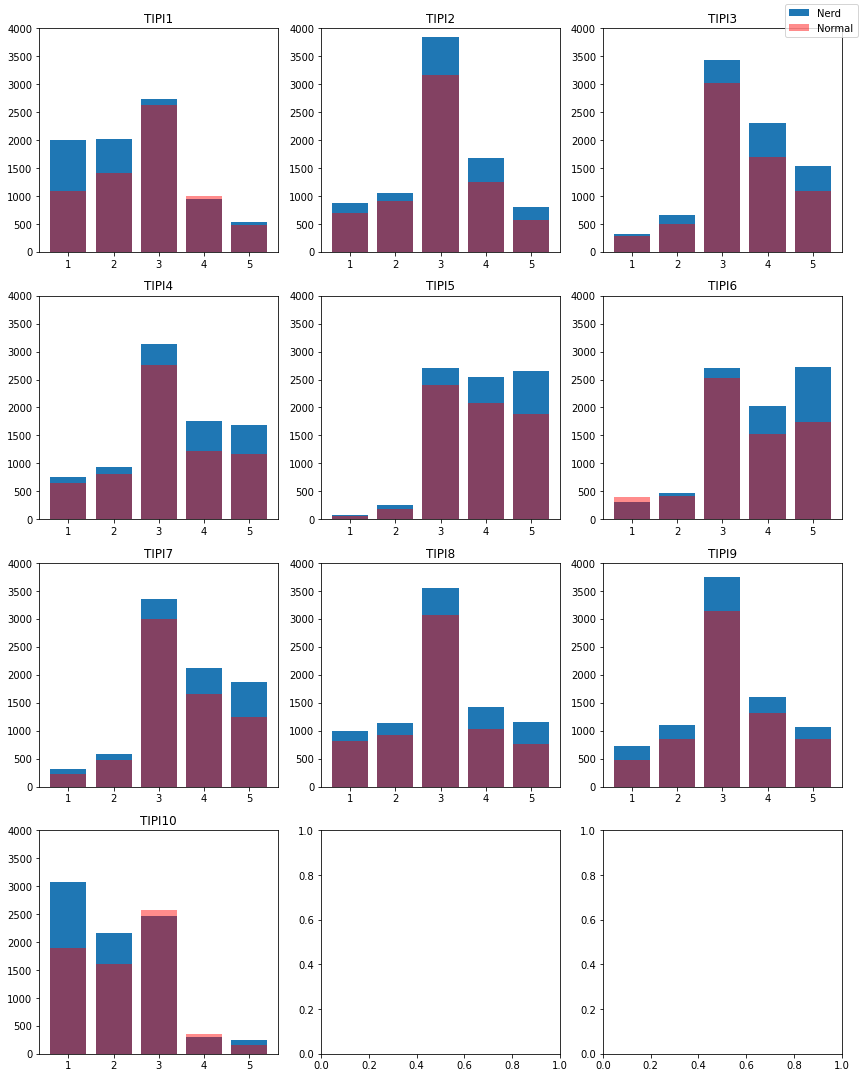

In [16]:
fig,ax = plt.subplots(4,3, figsize=(12,15))

for i in range(10):
    x_num = i//3
    y_num = i%3

    plot_dict = nerd.iloc[:,30+i].value_counts().to_dict()
    plot_dict2 = normal.iloc[:,30+i].value_counts().to_dict()

    x_values = sorted(plot_dict.keys())
    x_values2 = sorted(plot_dict2.keys())

    y_values = [plot_dict[x] for x in x_values]
    y_values2 = [plot_dict2[x] for x in x_values2]
    
    ax[x_num, y_num].bar(x_values, y_values,alpha=1,label='Nerd')
    ax[x_num, y_num].bar(x_values2, y_values2,alpha=0.45,color='red',label='Normal')

    ax[x_num, y_num].set_title(train.columns[30+i])
    ax[x_num, y_num].set_ylim(0,4000)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels[:1])]
fig.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()

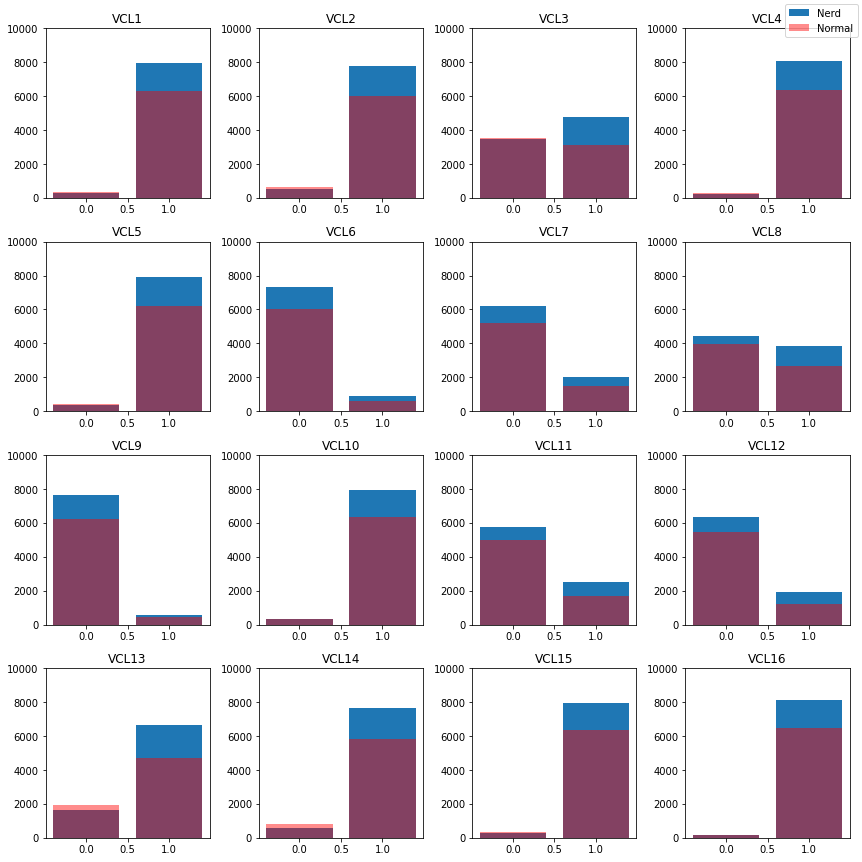

In [17]:
fig,ax = plt.subplots(4,4, figsize=(12,12))

for i in range(16):
    x_num = i//4
    y_num = i%4

    plot_dict = nerd.iloc[:,40+i].value_counts().to_dict()
    plot_dict2 = normal.iloc[:,40+i].value_counts().to_dict()

    x_values = sorted(plot_dict.keys())
    x_values2 = sorted(plot_dict2.keys())

    y_values = [plot_dict[x] for x in x_values]
    y_values2 = [plot_dict2[x] for x in x_values2]
    
    ax[x_num, y_num].bar(x_values, y_values,alpha=1,label='Nerd')
    ax[x_num, y_num].bar(x_values2, y_values2,alpha=0.45,color='red',label='Normal')

    ax[x_num, y_num].set_title(train.columns[40+i])
    ax[x_num, y_num].set_ylim(0,10000)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels[:1])]
fig.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()


# VCL1, 2, 3, 4, 5, 10*, 13, 14, 15, 16*

# 6,7,8,9,11,12

<AxesSubplot:xlabel='education', ylabel='count'>

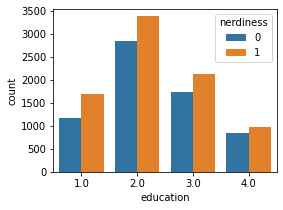

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'education', hue = train['nerdiness'])

<AxesSubplot:xlabel='urban', ylabel='count'>

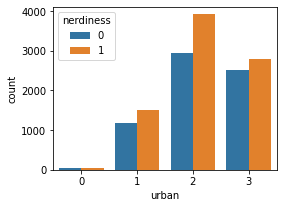

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'urban', hue = train['nerdiness'])

<AxesSubplot:xlabel='gender', ylabel='count'>

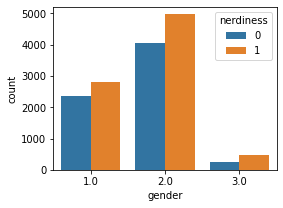

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'gender', hue = train['nerdiness'])

<AxesSubplot:xlabel='engnat', ylabel='count'>

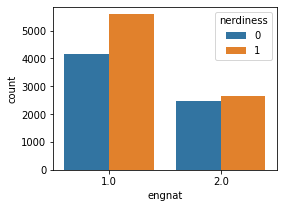

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'engnat', hue = train['nerdiness'])

<AxesSubplot:xlabel='age', ylabel='count'>

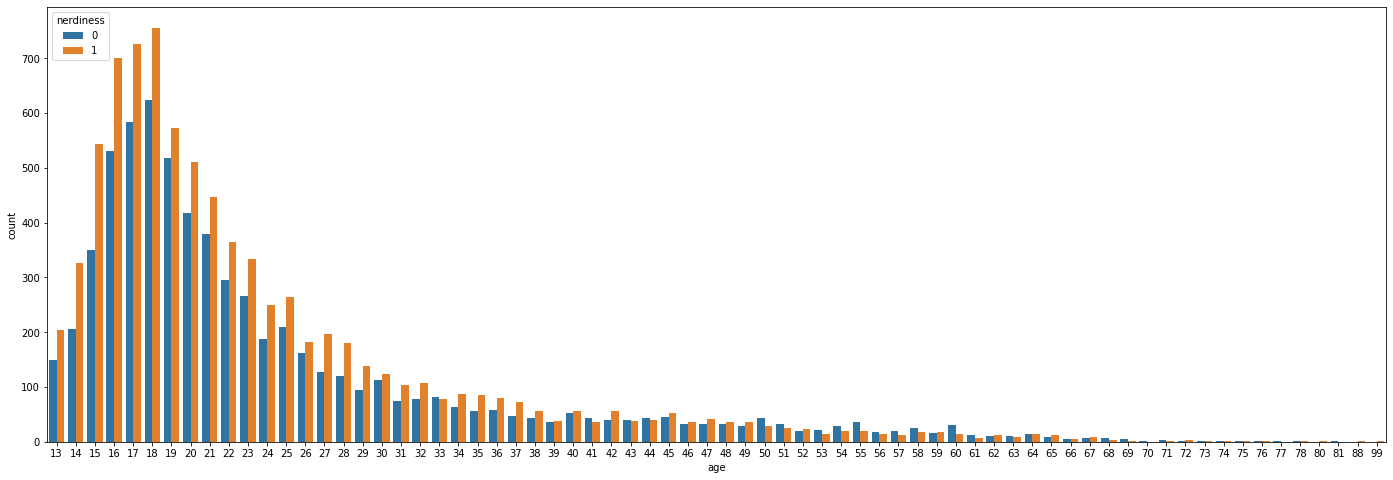

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize = (24,8))
sns.countplot(data = train, x = 'age', hue = train['nerdiness'])

<AxesSubplot:xlabel='hand', ylabel='count'>

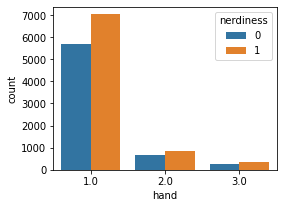

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'hand', hue = train['nerdiness'])

<AxesSubplot:xlabel='religion', ylabel='count'>

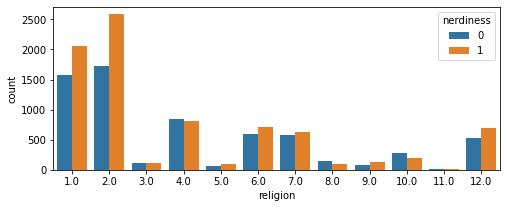

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize = (8,3))
sns.countplot(data = train, x = 'religion', hue = train['nerdiness'])

<AxesSubplot:xlabel='orientation', ylabel='count'>

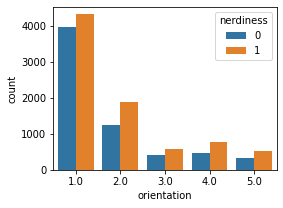

In [25]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'orientation', hue = train['nerdiness'])

<AxesSubplot:xlabel='voted', ylabel='count'>

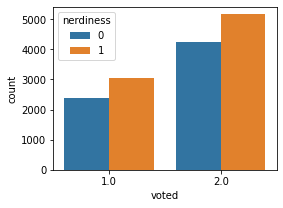

In [26]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'voted', hue = train['nerdiness'])

<AxesSubplot:xlabel='married', ylabel='count'>

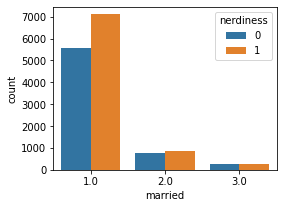

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'married', hue = train['nerdiness'])

<AxesSubplot:xlabel='familysize', ylabel='count'>

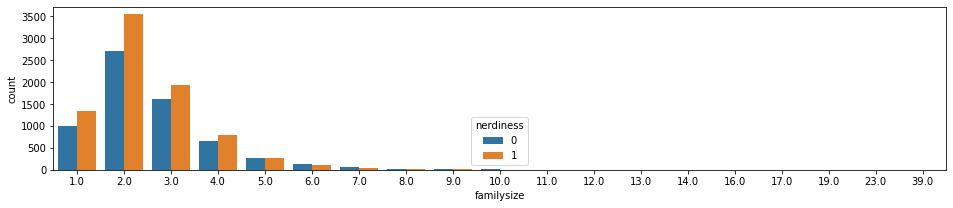

In [28]:
import matplotlib.pyplot as plt


plt.figure(figsize = (16,3))
sns.countplot(data = train, x = 'familysize', hue = train['nerdiness'])

<AxesSubplot:xlabel='ASD', ylabel='count'>

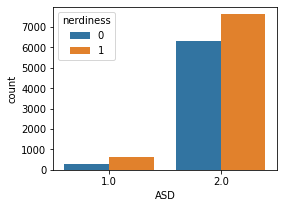

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize = (4,3))
sns.countplot(data = train, x = 'ASD', hue = train['nerdiness'])